# Heart Attack Possibility

## 1. Import Libraries and Dataset

In [508]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [509]:
df = pd.read_csv('./data/heart.csv')

In [510]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

About data set
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

Attribute Information
- **'age'** : age (umur)
- **'sex'** : sex (jenis kelamin)
- **'cp'** : chest pain type (4 values: 1 = Angina khas, 2 = Angina Atipikal, 3 = Nyeri non-Angina, 4 = Asimtomatik)
- **'trestbps'** : resting blood pressure (Tekanan darah saat istirahat > 120 mg / dl)
- **'chol'** : serum cholestoral in mg/dl 
- **'fbs'** : fasting blood sugar > 120 mg/dl
- **'restecg'** : resting electrocardiographic results (values 0 = Normal ,1 = Memiliki gelombang kelainan ST-T, 2 = Menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri dengan criteria estes)
- **'thalach'** : maximum heart rate achieved (detak jantung maksimum ynag dicapai)
- **'exang'** : exercise induced angina (latihan diinduksi Angina)
- **'oldpeak'** : oldpeak = ST depression induced by exercise relative to rest (Depresi ST akibat latihan relatif terhadap istirahat)
- **'slope'** : the slope of the peak exercise ST segment (1 = condong ke atas, 2 = datar, 3 = sedikit landai)
- **'ca'** : number of major vessels (0-3) colored by flourosopy (jumlah nadi utama)
- **'thal'** : thal: 0 = normal; 1 = fixed defect; 2 = reversable defect (normal, cacat tetap, cacat sementara)
- **'target'** : target: 0= less chance of heart attack 1= more chance of heart attack

Dataset is taken for learning purpose. Source of the data : https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [512]:
df.shape

(303, 14)

In [513]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [514]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## 2. Remove Duplicates

In [515]:
df.shape

(303, 14)

In [516]:
df.loc[df.duplicated()]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1

In [517]:
df = df.drop_duplicates(ignore_index=True)

In [518]:
df.shape

(302, 14)

## 3. Exploratory Data Analysis

### 3.1 Melihat distribusi data

In [519]:
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = ['sex' ,'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [520]:
num_colors = ['#FF4848', '#FFD371', '#64C9CF', '#9DDAC6', '#FA8072']
cat_colors = ['#64C9CF', '#C2FFD9', '#EFB7B7', '#FDE49C', '#28FFBF', '#FF67E7', '#FFF338', '#C9D8B6']

- Numerical Features

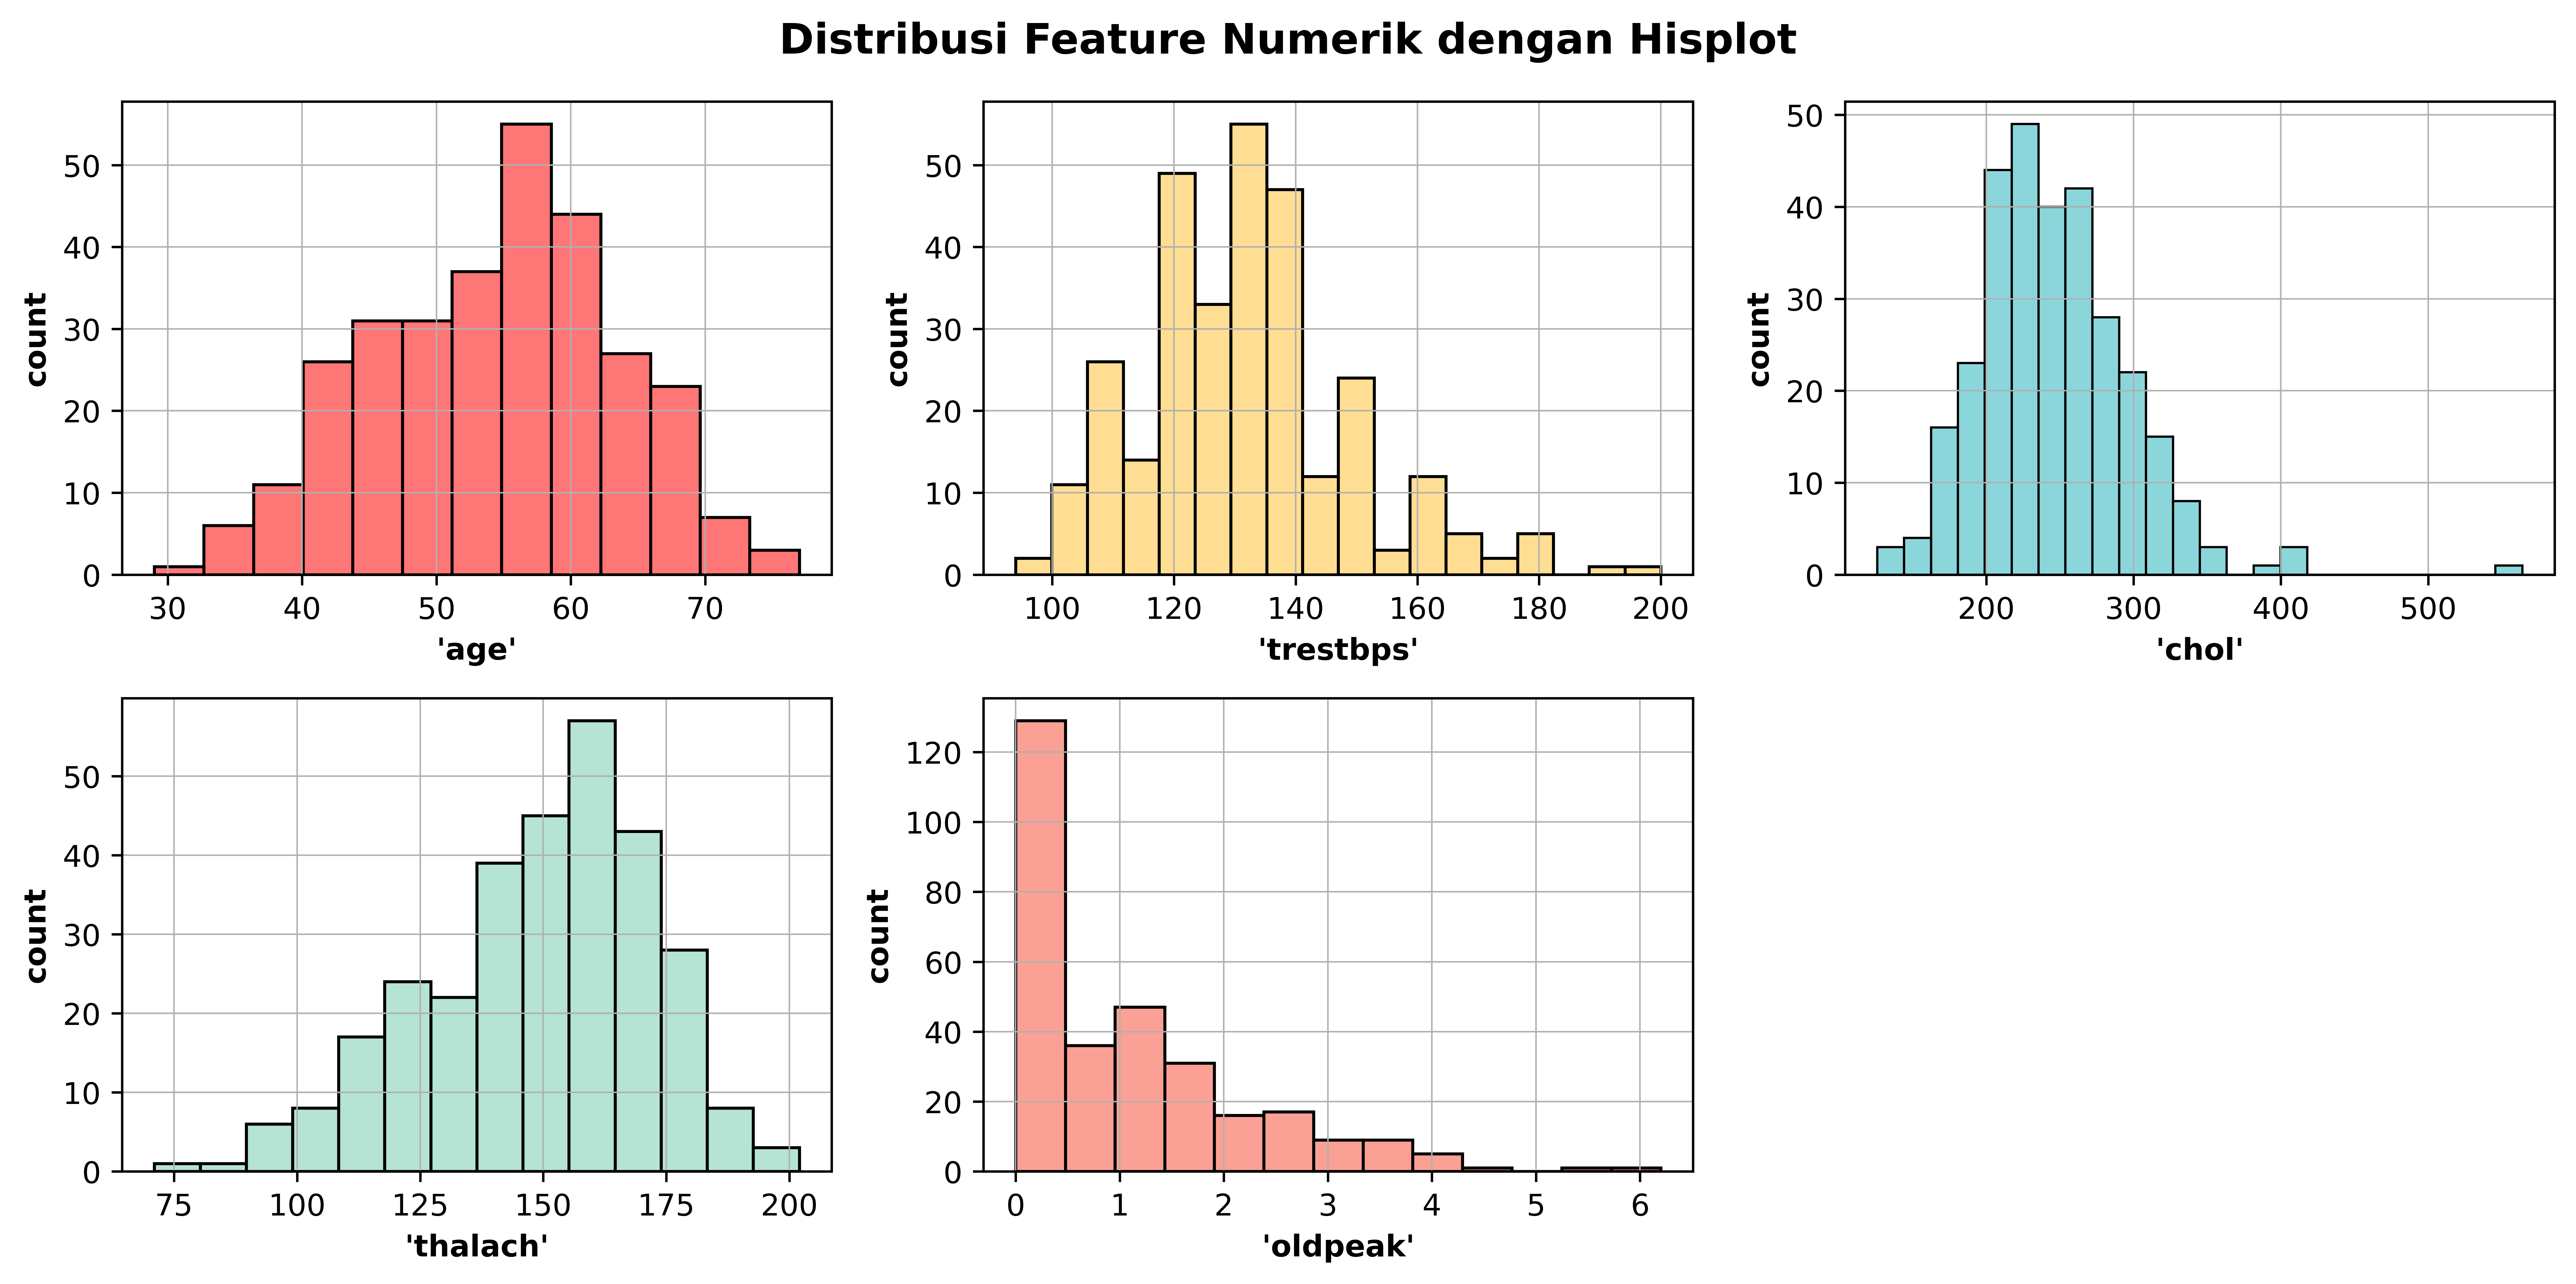

In [521]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6), dpi=800)
ax = ax.flatten()
plt.suptitle("Distribusi Feature Numerik dengan Hisplot", fontsize=14, fontweight='bold')

for col, index in zip(num_cols, range(len(num_cols))):
    sns.histplot(ax=ax[num_cols.index(col)], data=df[col], color=num_colors[index])
    ax[num_cols.index(col)].grid(linewidth=0.5)
    ax[num_cols.index(col)].set_xlabel(f"'{col}'", fontsize=10, fontweight='bold')
    ax[num_cols.index(col)].set_ylabel("count", fontsize=10, fontweight='bold')

ax[len(num_cols)].set_axis_off()
plt.tight_layout()
plt.show()

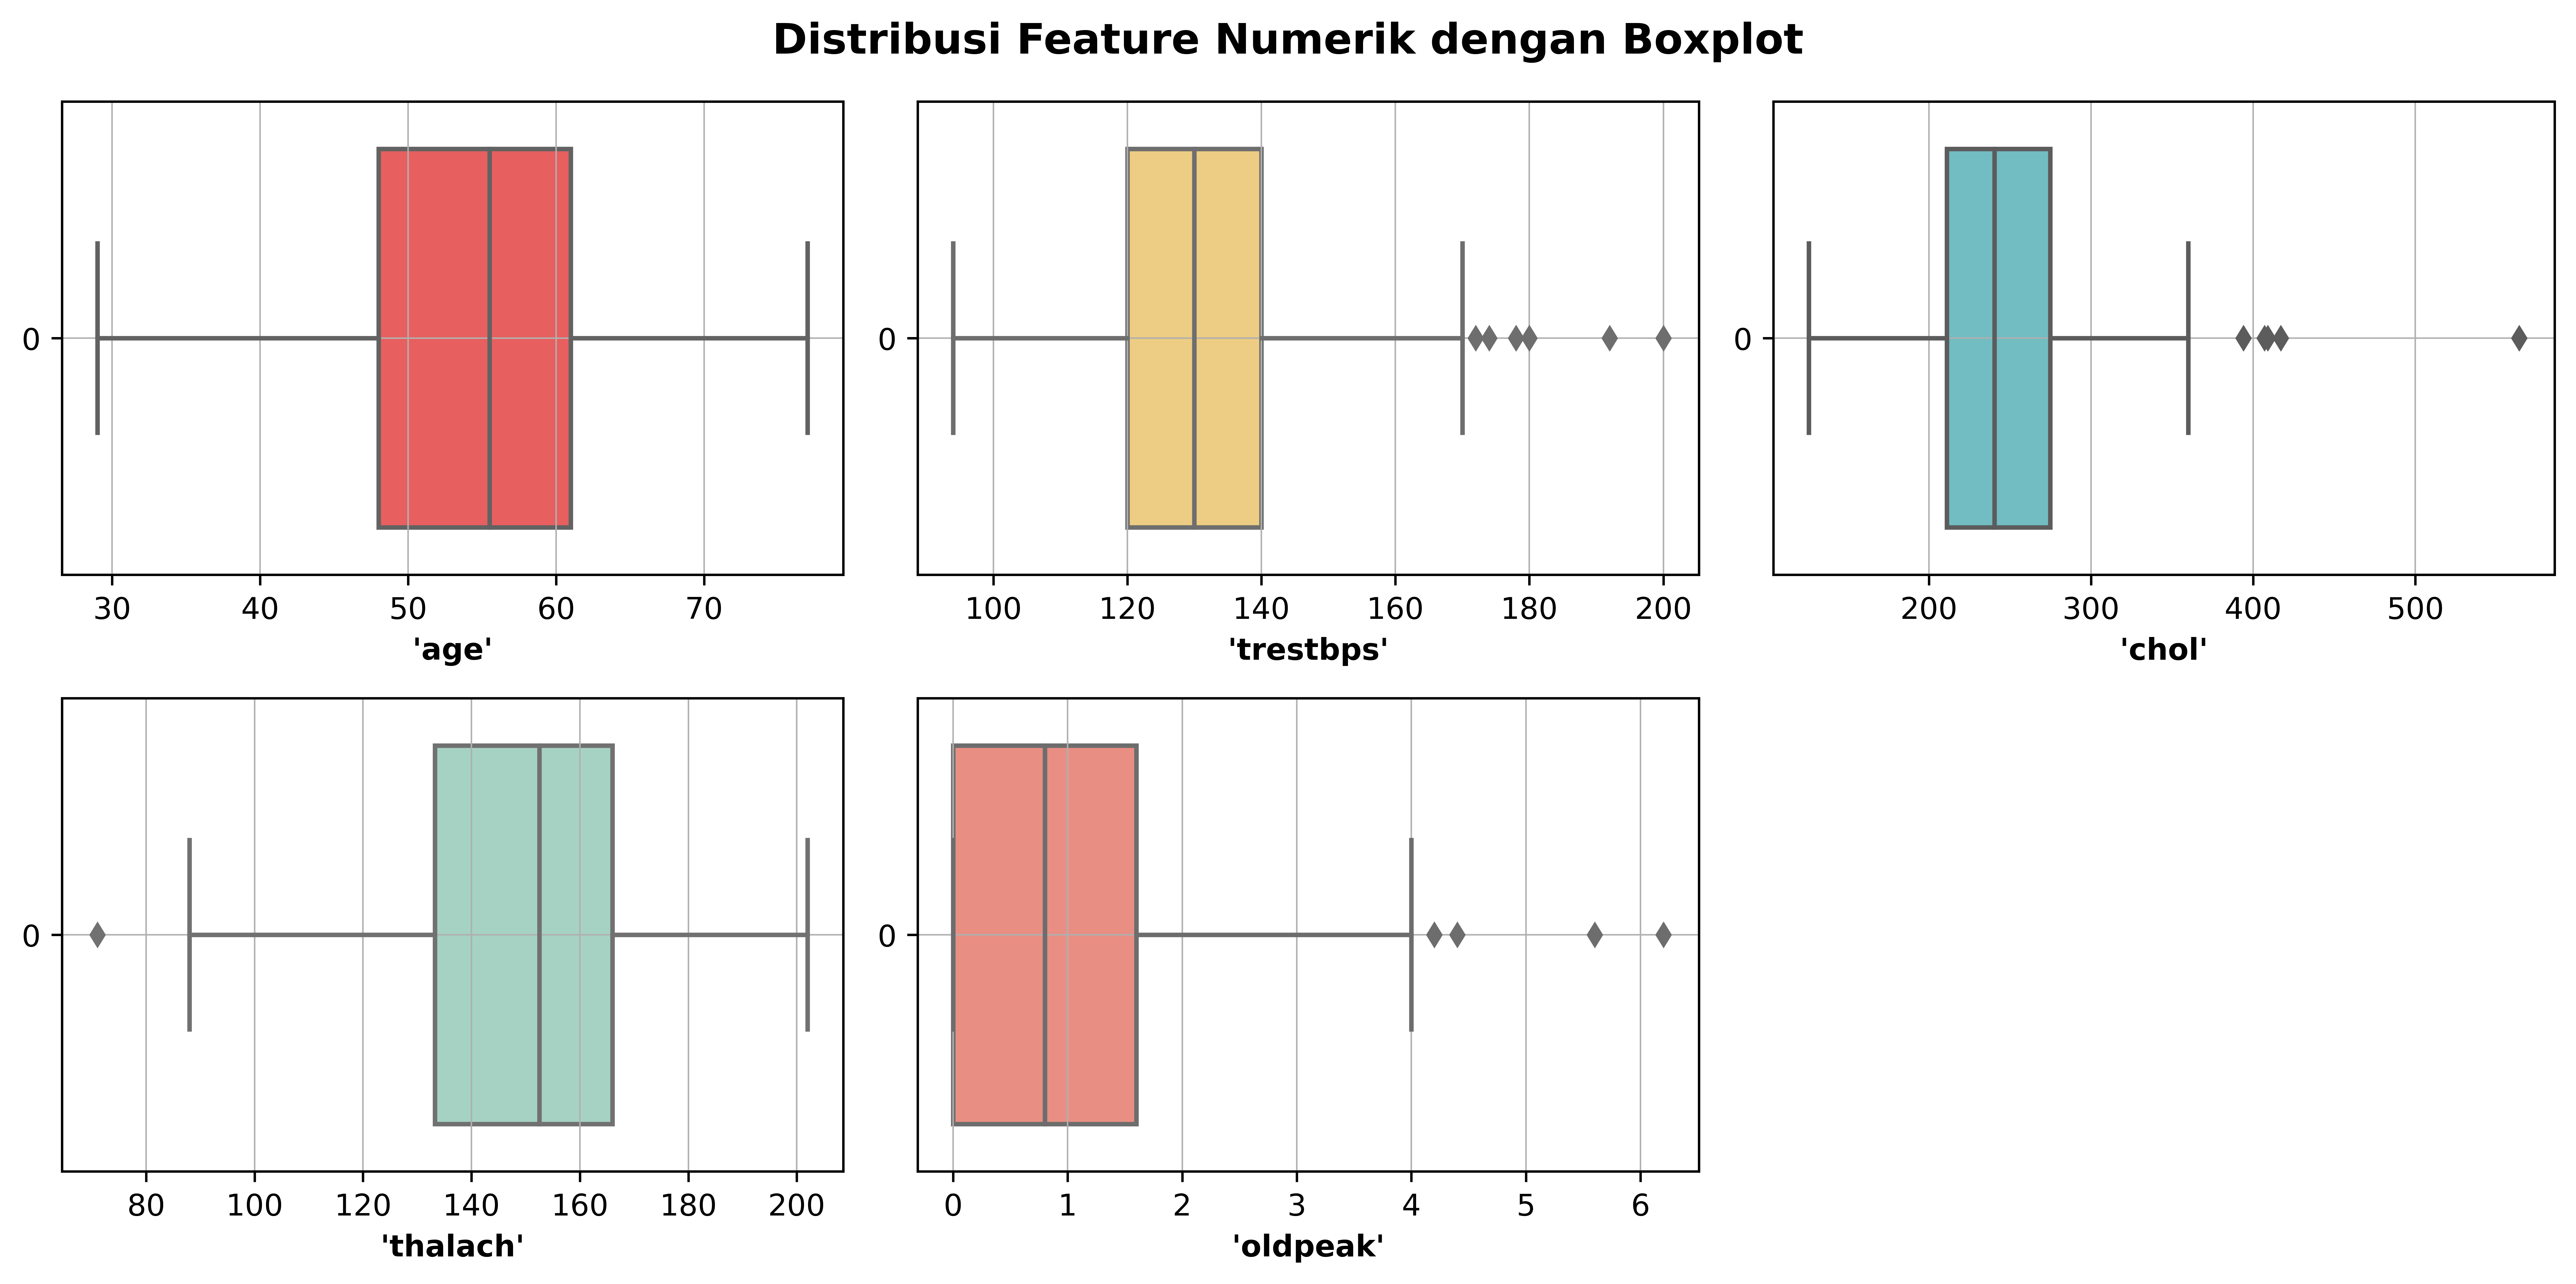

In [522]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6), dpi=800)
ax = ax.flatten()
plt.suptitle("Distribusi Feature Numerik dengan Boxplot", fontsize=14, fontweight='bold')

for col, index in zip(num_cols, range(len(num_cols))):
    sns.boxplot(ax=ax[num_cols.index(col)], data=df[col], orient='h', color=num_colors[index])
    ax[num_cols.index(col)].grid(linewidth=0.5)
    ax[num_cols.index(col)].set_xlabel(f"'{col}'", fontsize=10, fontweight='bold')

ax[len(num_cols)].set_axis_off()
plt.tight_layout()
plt.show()

- Catagorical Features

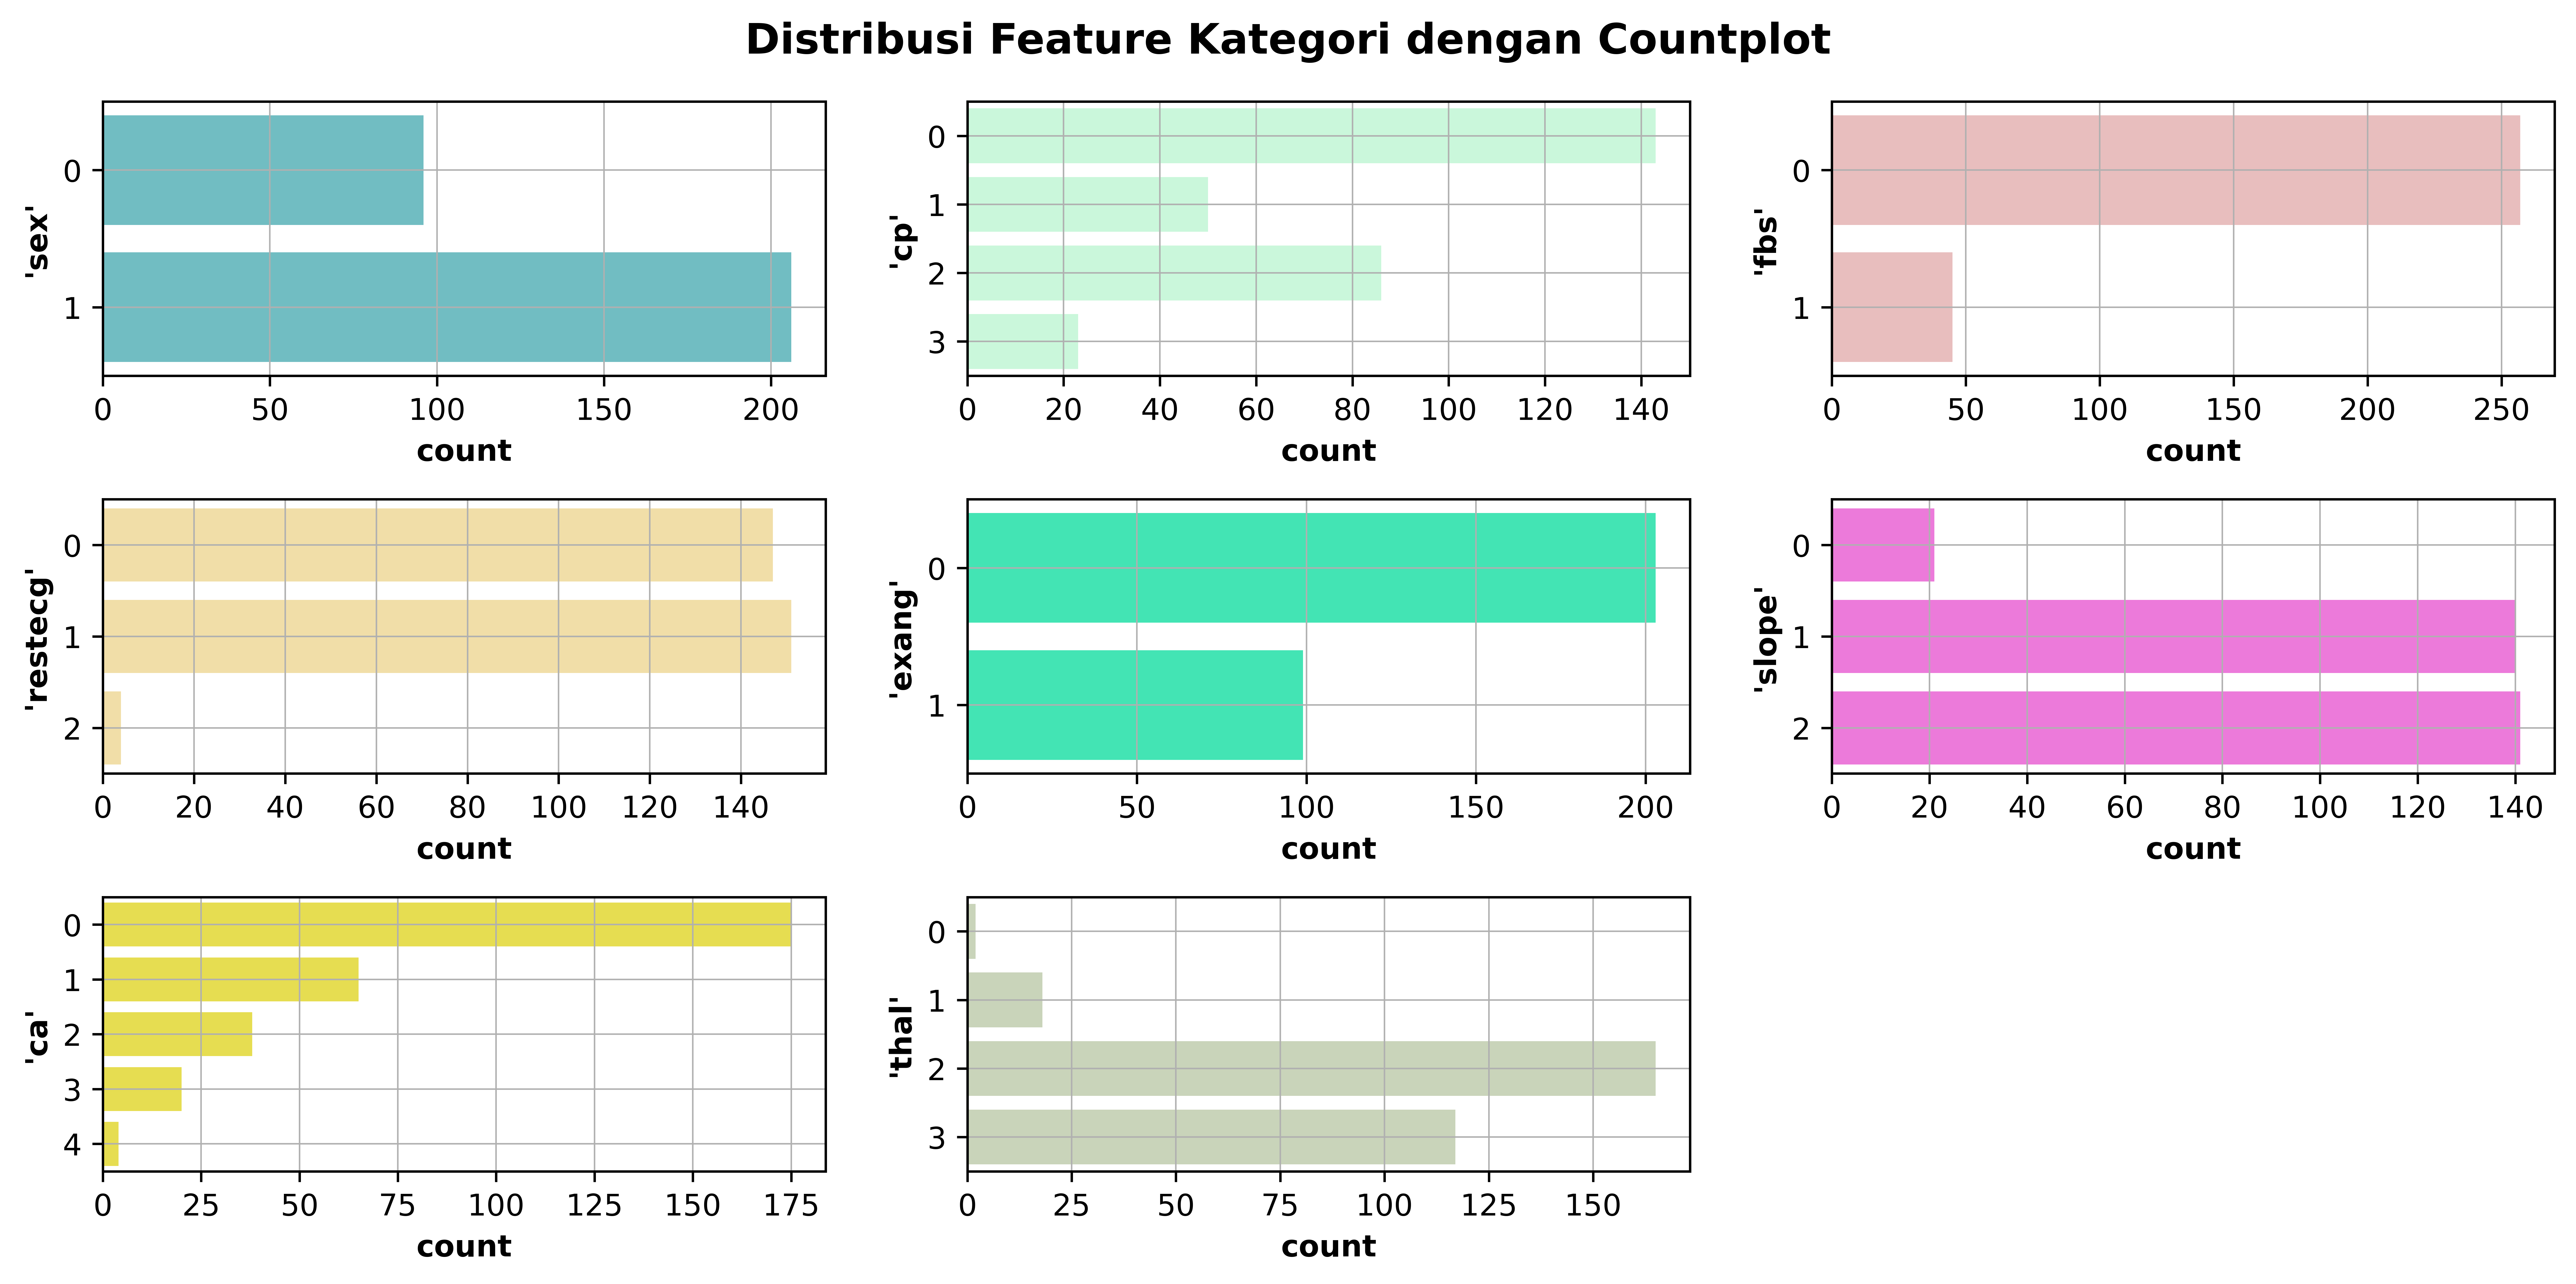

In [523]:
fig, ax = plt.subplots(3, 3, figsize=(12, 6), dpi=800)
ax = ax.flatten()
plt.suptitle("Distribusi Feature Kategori dengan Countplot", fontsize=14, fontweight='bold')

for col, index in zip(cat_cols, range(len(cat_cols))):
    sns.countplot(ax=ax[cat_cols.index(col)], y= col, data=df, color=cat_colors[index])
    ax[cat_cols.index(col)].grid(linewidth=0.5)
    ax[cat_cols.index(col)].set_xlabel("count", fontsize=10, fontweight='bold')
    ax[cat_cols.index(col)].set_ylabel(f"'{col}'", fontsize=10, fontweight='bold')

ax[len(cat_cols)].set_axis_off()
plt.tight_layout()
plt.show()

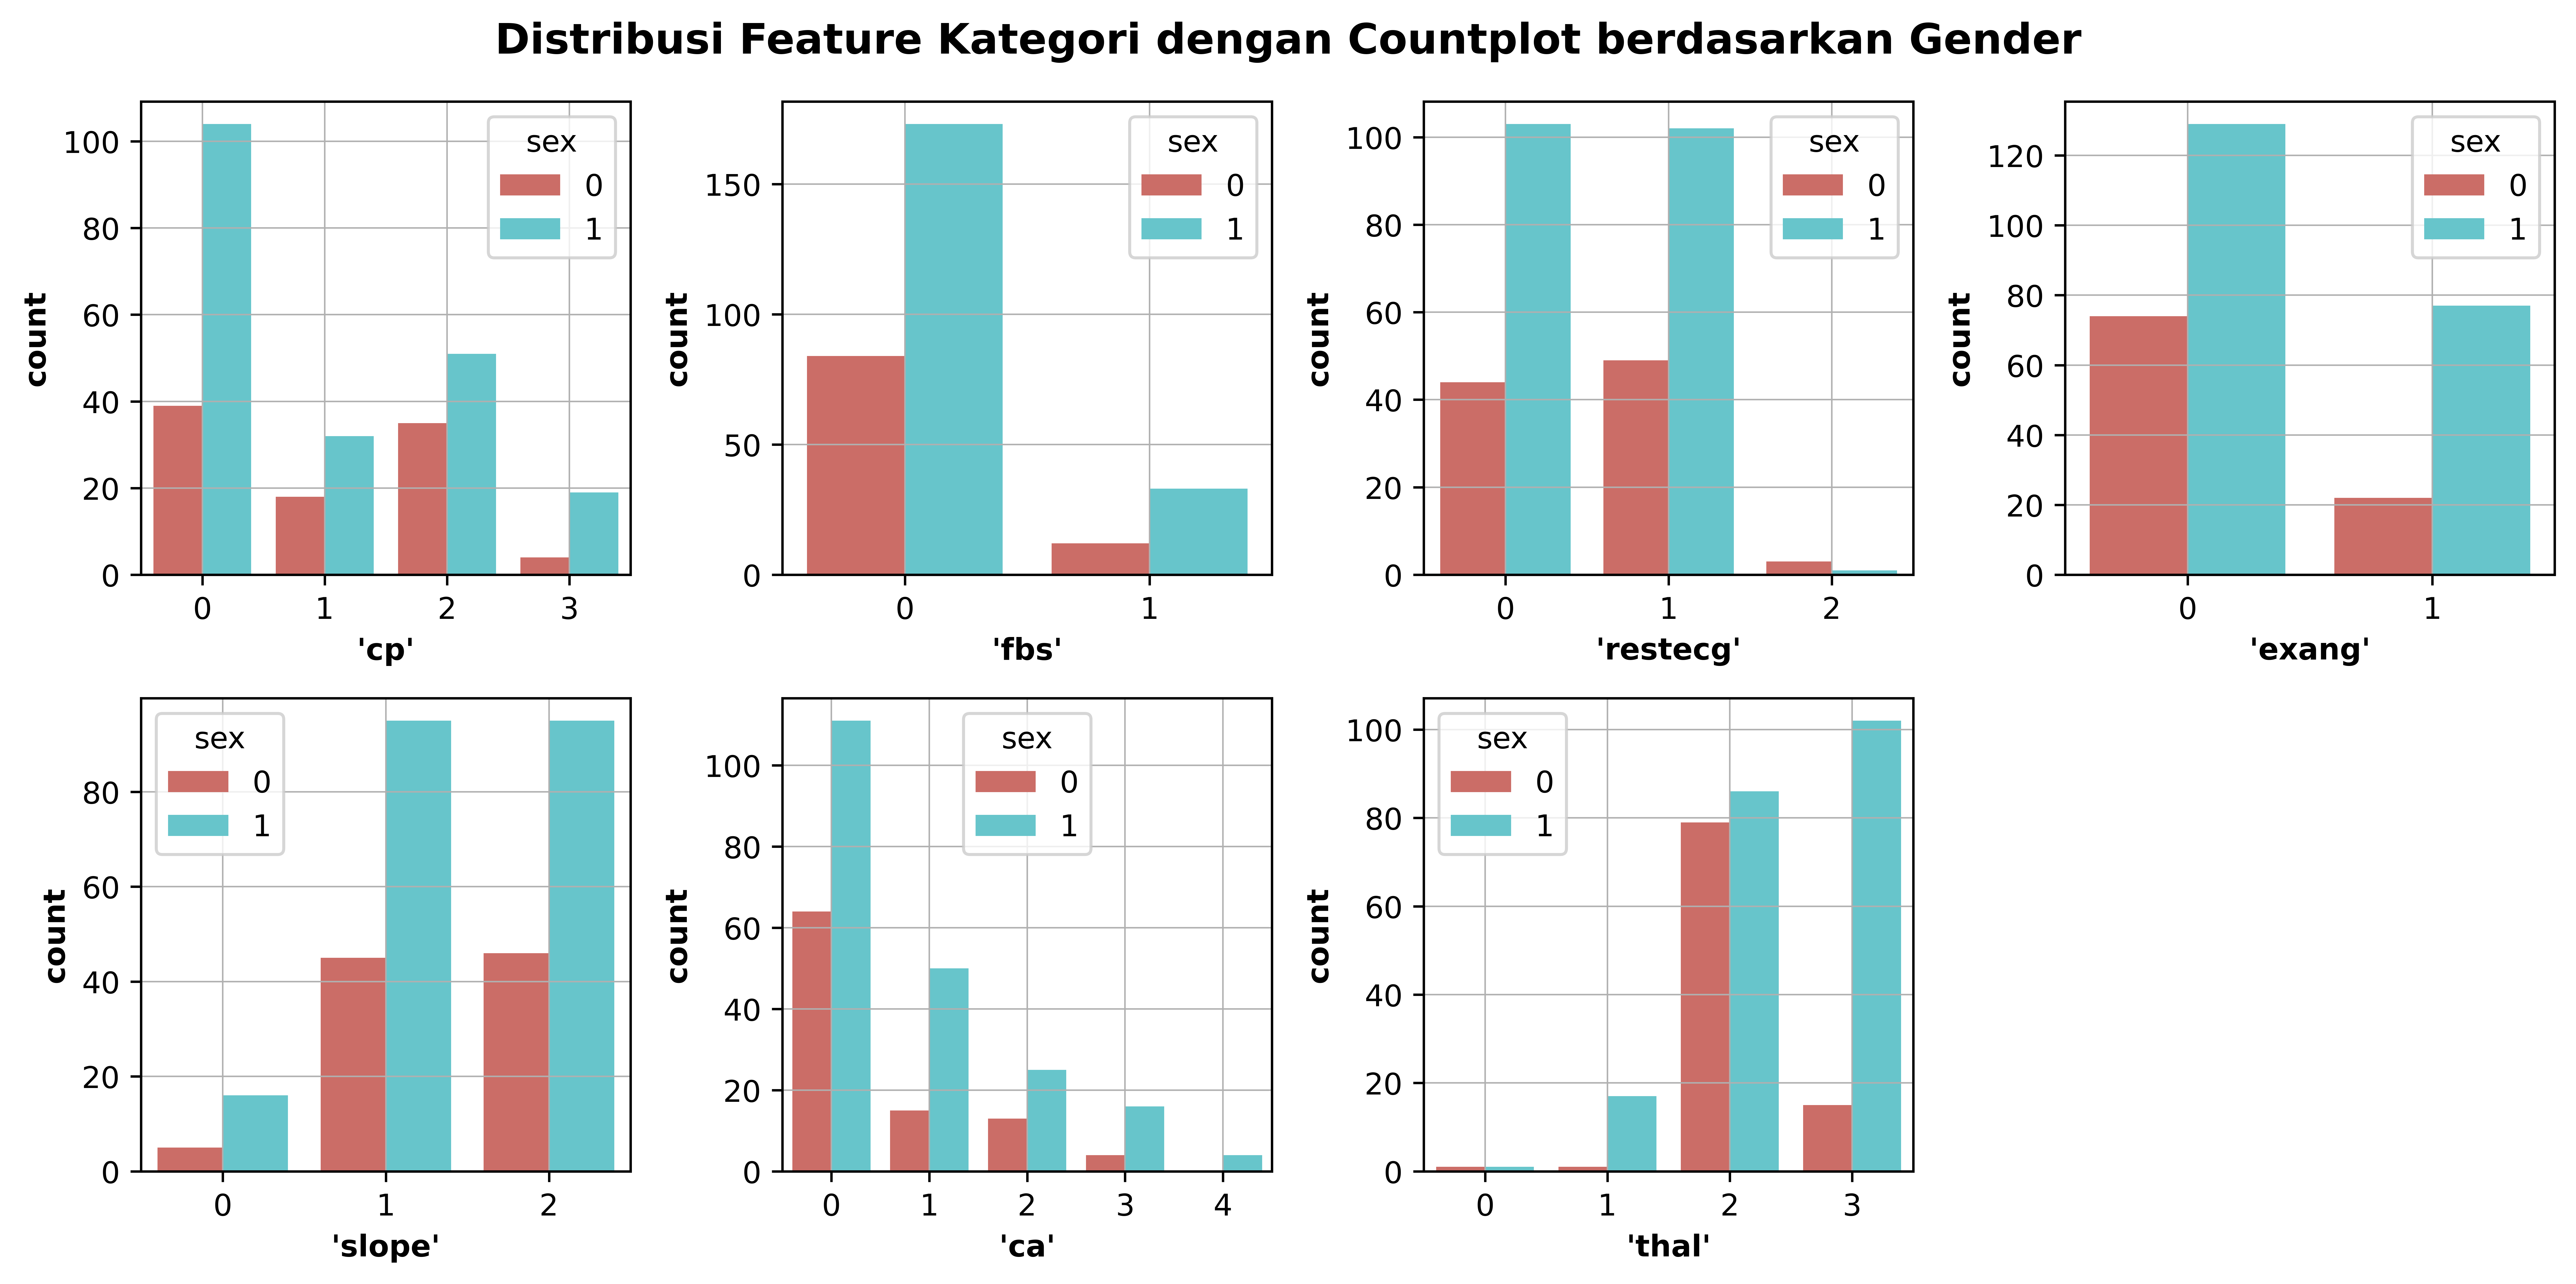

In [524]:
fig, ax = plt.subplots(2, 4, figsize=(12, 6), dpi=800)
ax = ax.flatten()
plt.suptitle("Distribusi Feature Kategori dengan Countplot berdasarkan Gender", fontsize=14, fontweight='bold')

for col, index in zip([col for col in cat_cols if col != 'sex'], range(len(cat_cols)-1)):
    sns.countplot(ax=ax[cat_cols.index(col)-1], x=col, data=df,
                  color=cat_colors[index],
                  hue='sex',
                  palette='hls')
    ax[cat_cols.index(col)-1].grid(linewidth=0.5)
    ax[cat_cols.index(col)-1].set_xlabel(f"'{col}'", fontsize=10, fontweight='bold')
    ax[cat_cols.index(col)-1].set_ylabel("count", fontsize=10, fontweight='bold')

# ax[len(cat_cols)].set_axis_off()
ax[len(cat_cols)-1].set_axis_off()
plt.tight_layout()
plt.show()

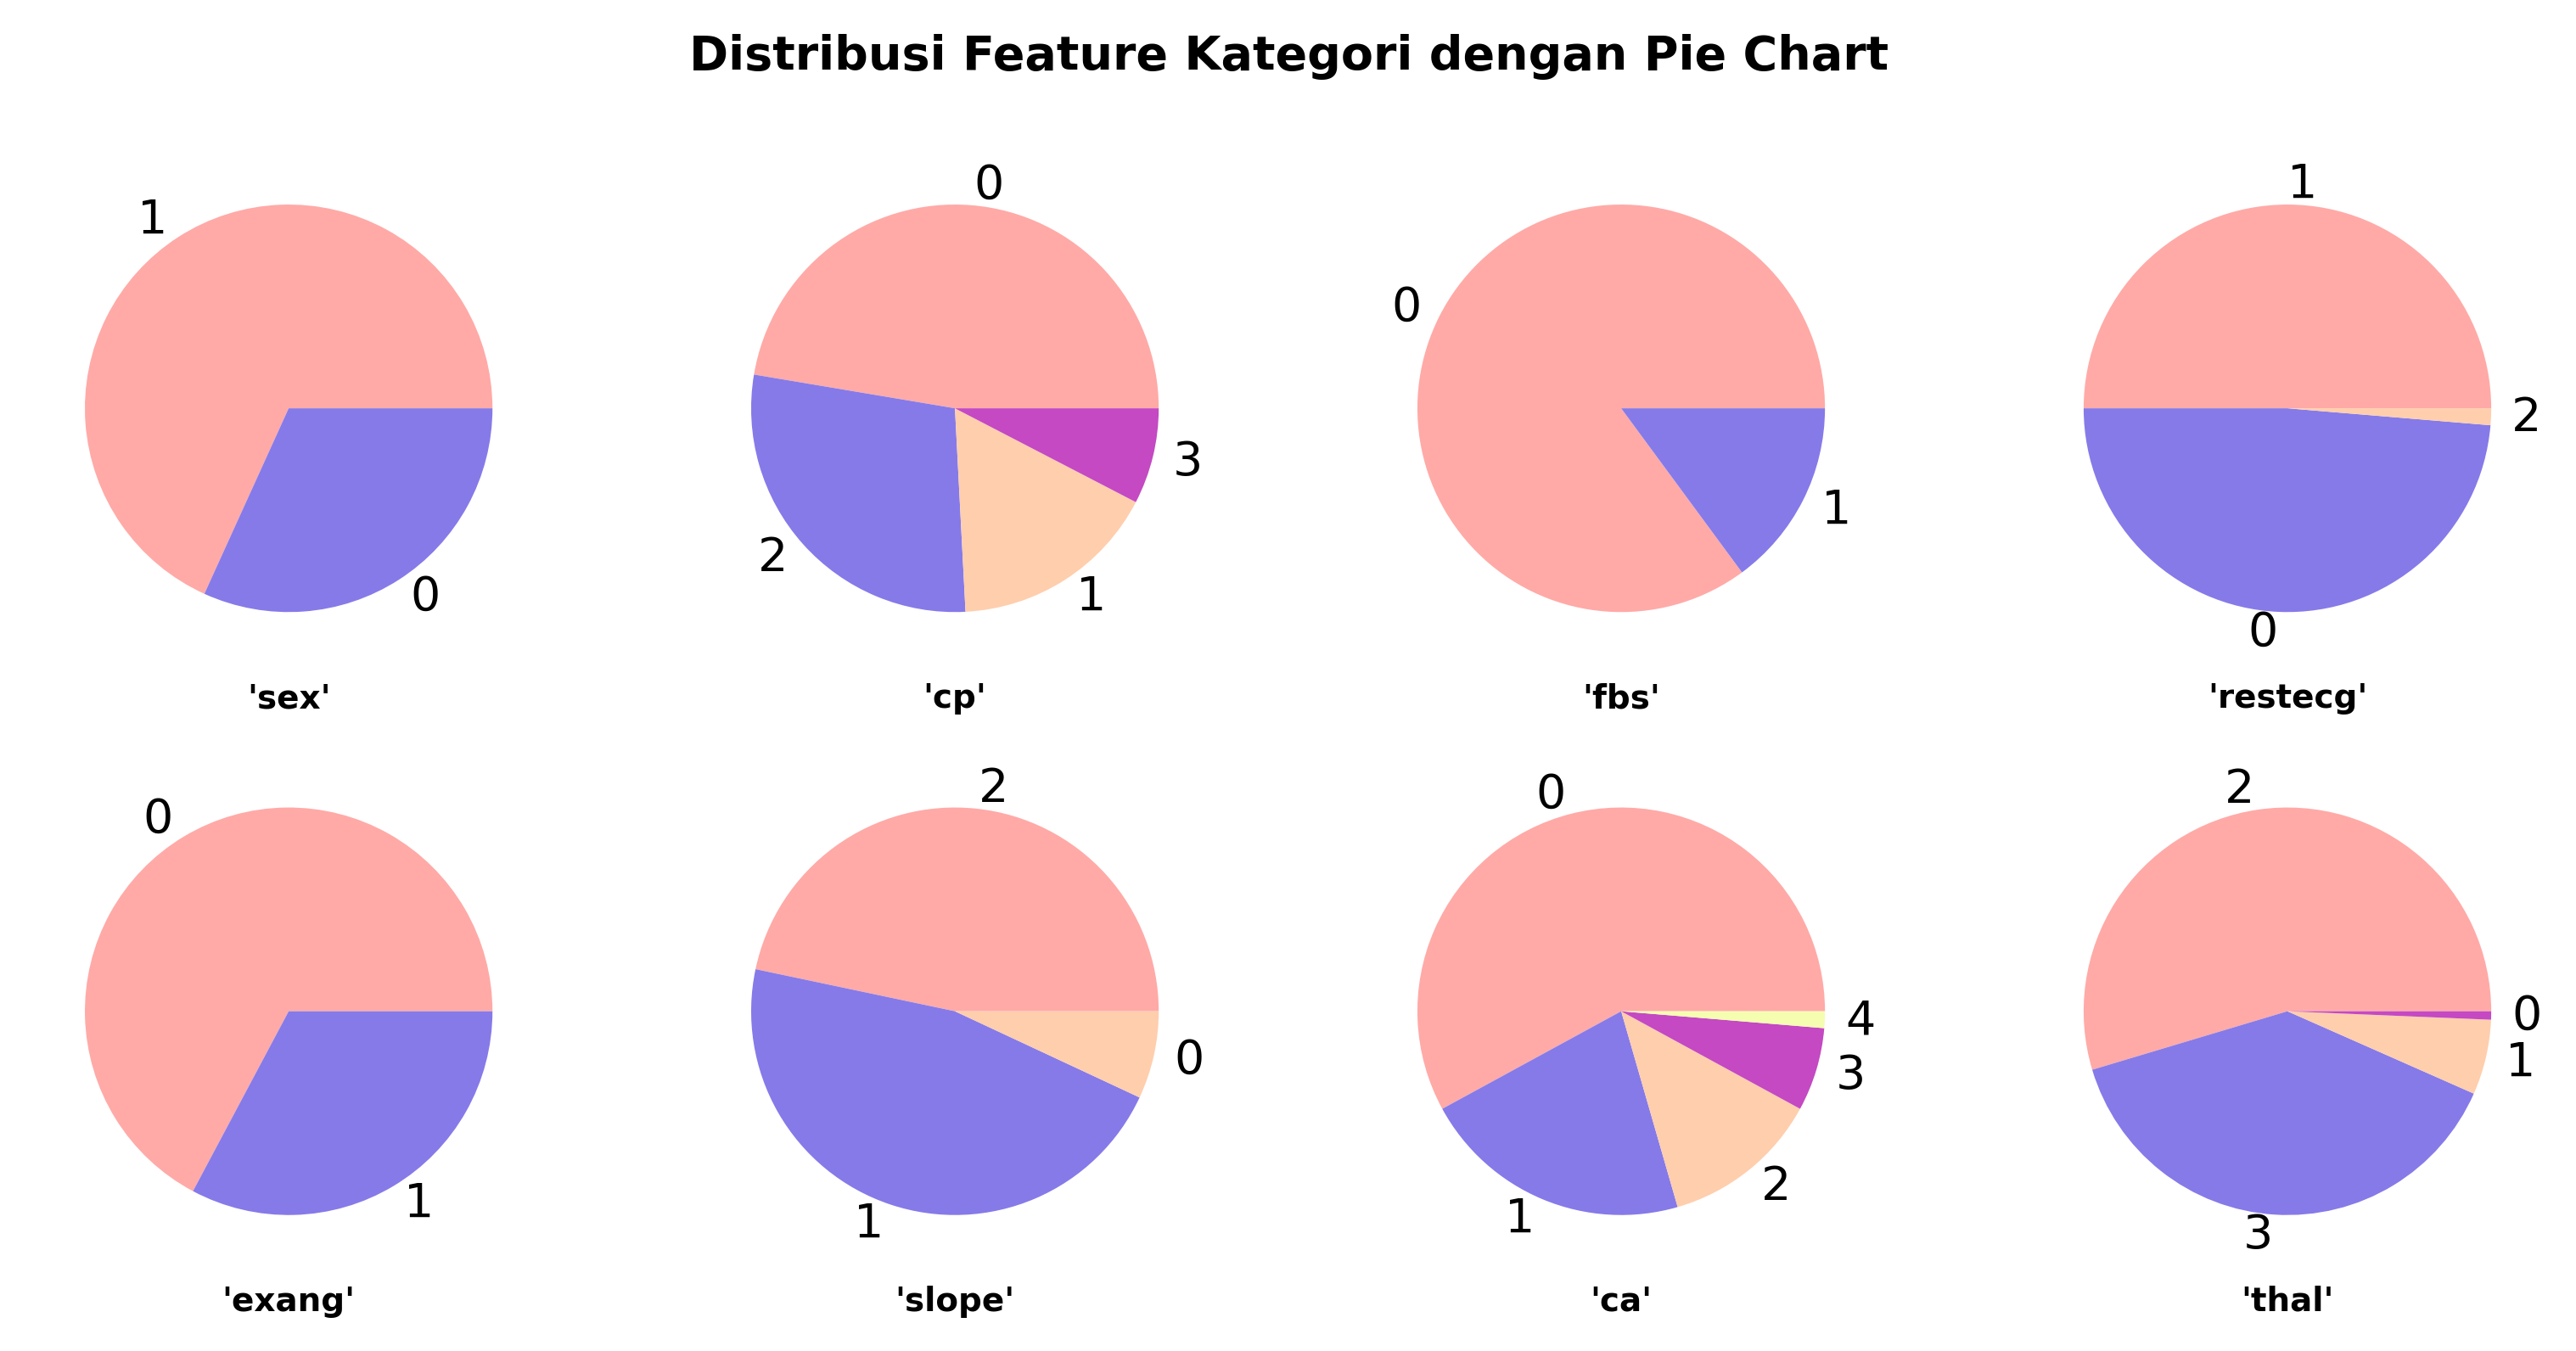

In [525]:
fig, ax = plt.subplots(2, 4, figsize=(8, 4), dpi=400)
ax = ax.flatten()
plt.suptitle("Distribusi Feature Kategori dengan Pie Chart", fontsize=10, fontweight='bold')

colors = ['#FFAAA7', '#867AE9', '#FFCEAD', '#C449C2', '#F5FDB0']

for col in cat_cols:
    df[col].value_counts().plot(ax=ax[cat_cols.index(col)], colors=colors ,kind='pie')
    ax[cat_cols.index(col)].set_xlabel(f"'{col}'", fontsize=7, fontweight='bold')
    ax[cat_cols.index(col)].set_ylabel(None)

plt.tight_layout()
plt.show()

### 3.2 Melihat korelasi data

In [526]:
fig, ax = plt.subplots(2, 2, figsize=(14, 7), sharey=True, dpi=800)
ax = ax.flatten()
plt.suptitle("Korelasi Umur terhadap Semua Feature Numerik berdasarkan Gender", fontsize=14, fontweight='bold')

for col, index in zip([col for col in num_cols if col != 'age'], range(len(num_cols)-1)):
    sns.scatterplot(ax=ax[num_cols.index(col)-1], x=col, y='age', data=df, hue='sex')
    ax[num_cols.index(col)-1].set_xlabel(f"'{col}'", fontsize=10, fontweight='bold')
    ax[num_cols.index(col)-1].set_ylabel(f"'age'", fontsize=10, fontweight='bold')
    ax[num_cols.index(col)-1].legend(['female', 'male'])

plt.ylim(ymax=90)
plt.tight_layout()
plt.show()

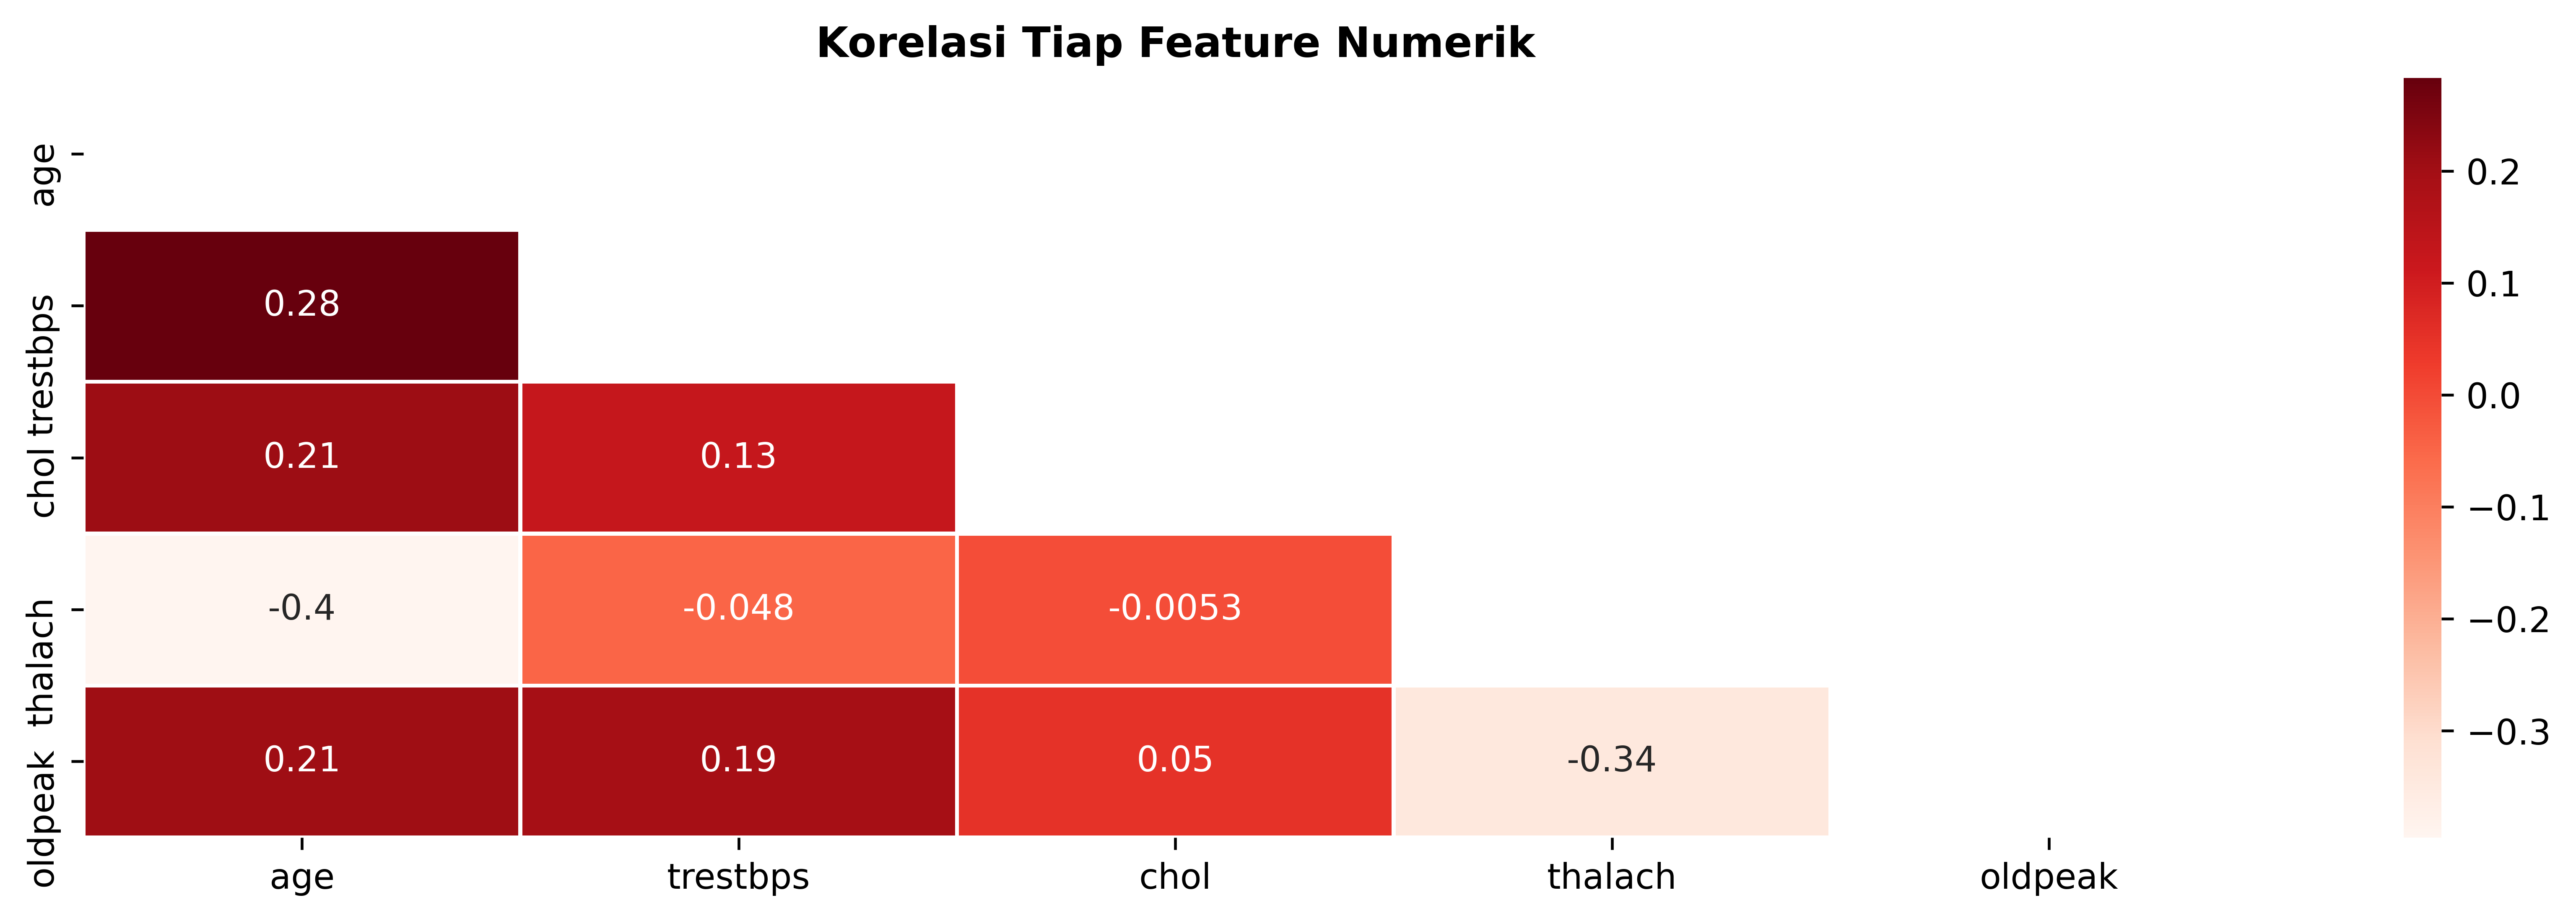

In [527]:
fig, ax = plt.subplots(figsize=(14, 4), dpi=600)
mask = np.triu(df[num_cols].corr())

sns.heatmap(df[num_cols].corr(), annot=True, cmap='Reds', mask=mask, linewidths=1)

plt.title("Korelasi Tiap Feature Numerik", fontsize=12, fontweight='bold')
plt.show()

## 4. Feature Engineering

### 4.1 Membuat kolom baru dari umur

Dengan rentang:

   - kurang dari sama dengan 50 -> gol '1'
   - 51 - 60 -> gol '2'
   - 61 - 70 -> gol '3'
   - lebih dari sama dengan 71 -> gol '4'

In [528]:
df['catage'] = pd.cut(df['age'], bins=[0, 50, 60, 70, 100], labels=[1, 2, 3, 4])
df.drop(columns='age', inplace=True)

In [529]:
df.head()

sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  \
0    1   3       145   233    1        0      150      0      2.3      0   0   
1    1   2       130   250    0        1      187      0      3.5      0   0   
2    0   1       130   204    0        0      172      0      1.4      2   0   
3    1   1       120   236    0        1      178      0      0.8      2   0   
4    0   0       120   354    0        1      163      1      0.6      2   0   

   thal  target catage  
0     1       1      3  
1     2       1      1  
2     2       1      1  
3     2       1      2  
4     2       1      2

## 5. Modeling 

### 5.1 Splitting & Fitting 

In [530]:
X = df.drop(columns='target')
y = df['target']

In [531]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [532]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [533]:
print(f"Score: {model.score(X_test, y_test)}")

Score: 0.819672131147541


### 5.2 Classification Report 

In [534]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



## 6. Model Evaluation 

### 6.1 Hyper-Parameter Tuning dengan GridSearchCV 

In [535]:
pipeline = Pipeline([
    ('algo', DecisionTreeClassifier())
])

- Tuning dua parameter pada DecisionTree yaitu parameter `criterion` dan `max_depth`

In [536]:
parameters = {
    'algo__max_depth':range(2, 21, 2),
    'algo__criterion':['gini', 'entropy']
}

In [537]:
new_model = GridSearchCV(pipeline, parameters, cv=4, verbose=1)
new_model.fit(X_train, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('algo', DecisionTreeClassifier())]),
             param_grid={'algo__criterion': ['gini', 'entropy'],
                         'algo__max_depth': range(2, 21, 2)},
             verbose=1)

- Melihat parameter terbaik pada model baru

In [538]:
new_model.best_params_

{'algo__criterion': 'entropy', 'algo__max_depth': 6}

In [539]:
model.score(X_test, y_test), new_model.score(X_test, y_test)

(0.819672131147541, 0.8032786885245902)

In [540]:
print(classification_report(y_test, new_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.88      0.72      0.79        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



### 6.2 Confussion Matrix 

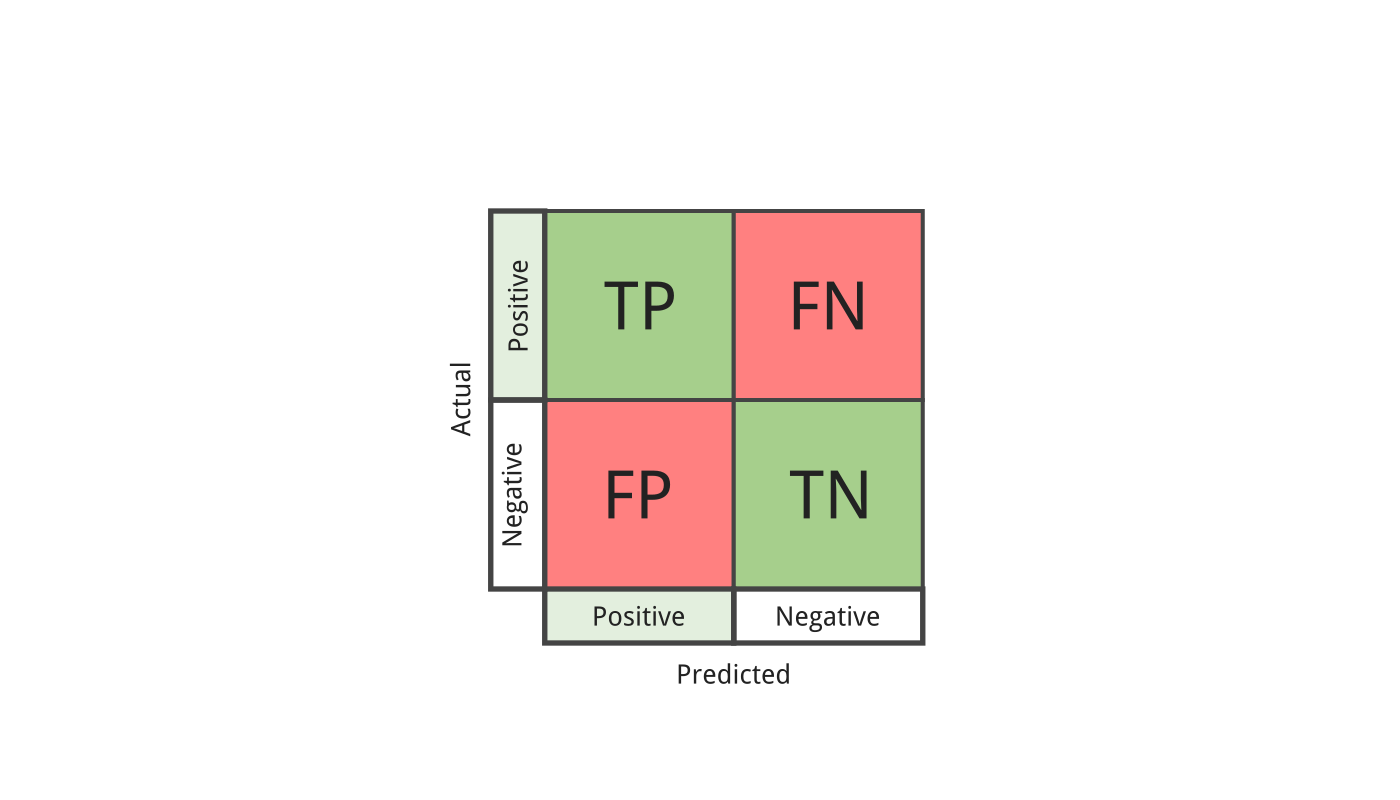

*image by: MLeeDataScience in Toward Data Science*

Membandingkan akurasi antara model yang tidak di tuning dan yang sudah di tuning

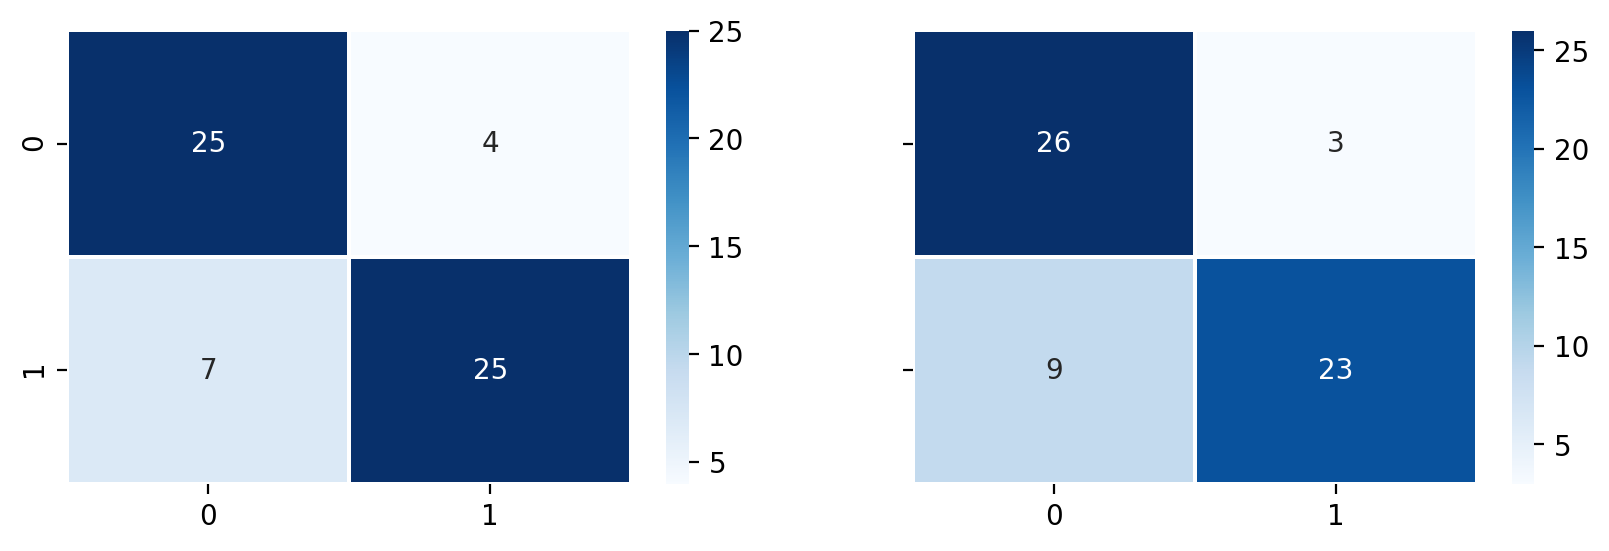

In [541]:
mx_1 = confusion_matrix(y_test, model.predict(X_test))
mx_2 = confusion_matrix(y_test, new_model.predict(X_test))

fig, ax = plt.subplots(1, 2, figsize=(10, 3), dpi=200, sharey=True)
ax = ax.flatten()
sns.heatmap(mx_1, ax=ax[0], cmap='Blues', annot=True, linewidths=1)
sns.heatmap(mx_2, ax=ax[1], cmap='Blues', annot=True, linewidths=1)

plt.show()

- Presentase prediksi model pertama

In [542]:
print(f"True Positif\t:{round(mx_1[0][0] / (mx_1[0][0] + mx_1[0][1]) * 100, 3)}%")
print(f"True Negatif\t:{round(mx_1[1][1] / (mx_1[1][1] + mx_1[1][0]) * 100, 3)}%")

True Positif	:86.207%
True Negatif	:78.125%


- Presentase prediksi model kedua

In [543]:
print(f"True Positif\t:{round(mx_2[0][0] / (mx_2[0][0] + mx_2[0][1]) * 100, 3)}%")
print(f"True Negatif\t:{round(mx_2[1][1] / (mx_2[1][1] + mx_2[1][0]) * 100, 3)}%")

True Positif	:89.655%
True Negatif	:71.875%


## 7. Save Model

In [544]:
import pickle

In [545]:
model_name = "heart.dt"
pickle.dump(model, open(model_name, 'wb'))

In [546]:
new_model_name = "new_heart.dt"
pickle.dump(new_model, open(new_model_name, 'wb'))

## Referensi

- Veratamala, Arinda. (2021). *Awas, Ini Akibatnya Jika Gula Darah Anda Terlalu Tinggi*. Diakses dari https://hellosehat.com/diabetes/akibat-gula-darah-tinggi/ pada 5 Agustus 2021.
- American Heart Association editorial staff. (2021). *Understanding Blood Pressure Readings*. Diakses dari https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings pada 6 Agustus 2021.
- American Heart Association editorial staff. (2021). *Target Heart Rates Chart*. Diaskes dari https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates pada 7 Agustus 2021.
- MLeeDataScience. (2021). *Visual Guide to the Confusion Matrix*. Diakses dari https://towardsdatascience.com/visual-guide-to-the-confusion-matrix-bb63730c8eba pada 7 Agustus 2021.